In [1]:
import seaborn as sns
import numpy as np
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
import json
import os
from vinum_analytica.utils import wilcoxon_test # type: ignore
from vinum_analytica.visualization.plots import Plotter # type: ignore

In [2]:
def save_best(model_data, model_name, filename):
    """Salva il modello migliore."""

    best_model_file = filename
    if os.path.exists(best_model_file):
        with open(best_model_file, 'r') as file:
            data = json.load(file)
    else:
        data = []

    # Append the new best model data
    data.append({
        "model_name": model_name,
        "hyperparams": model_data['hyperparams'],
        "accuracies": model_data['accuracies']
    })

    # Write the updated data back to the file
    with open(best_model_file, 'w') as file:
        json.dump(data, file, indent=4)

In [3]:
def model_analysis(json_file, model_name):
    try:
        # Load data from JSON file
        with open(json_file, 'r') as file:
            model_data = json.load(file)

        # Calculate mean accuracy for each set
        mean_accuracies = [np.mean(d['accuracies']) for d in model_data]

        print(f"Mean accuracies: {mean_accuracies}")

        print(f"Model : Average Accuracy [Min, Max]")
        for i, d in enumerate(model_data):
            print(f"Model {i}: {mean_accuracies[i]:.4f} [{min(d['accuracies']):.4f}, {max(d['accuracies']):.4f}]")


        # Find the hyperparameters with the best mean accuracy
        best_index = np.argmax(mean_accuracies)
        best_data = model_data[best_index]

        # Perform Wilcoxon test
        wilcoxon_results = wilcoxon_test(best_index, model_data)

        print(f"Best model index: {best_index}")
        print(f"Best model hyperparameters: {best_data['hyperparams']}")
        print(f"Wilcoxon test results: {wilcoxon_results}")

        # Write the data of the best model to a file with a new fild with the model name
        save_best(best_data, model_name, '../results/best.json')
        
        # Create and show violin plot
        plotter = Plotter()
        plotter.plot_violin_accuracy_comparison(model_data, '')

    except FileNotFoundError:
        print(f"File not found")
    except json.JSONDecodeError:
        print(f"Error decoding JSON file: {json_file}")
    except Exception as e:
        print(f"An error occurred: {e}")

In [4]:
# Open the file in write mode to reset its contents
with open('../results/best.json', 'w') as file:
    file.write('[]')

Mean accuracies: [0.39541084651538355, 0.349733213213846, 0.3977370202223556, 0.3968892776692685, 0.3515609818270573, 0.35305650356941004, 0.35232541832184633, 0.39549368045797806, 0.3476895502307751, 0.39428072907519424]
Model : Average Accuracy [Min, Max]
Model 0: 0.3954 [0.3894, 0.4014]
Model 1: 0.3497 [0.3417, 0.3545]
Model 2: 0.3977 [0.3934, 0.4070]
Model 3: 0.3969 [0.3881, 0.4025]
Model 4: 0.3516 [0.3458, 0.3577]
Model 5: 0.3531 [0.3459, 0.3666]
Model 6: 0.3523 [0.3483, 0.3551]
Model 7: 0.3955 [0.3882, 0.4001]
Model 8: 0.3477 [0.3433, 0.3537]
Model 9: 0.3943 [0.3863, 0.4030]
Best model index: 2
Best model hyperparameters: {'criterion': 'gini', 'min_impurity_decrease': 1e-08, 'max_depth': 200}
Wilcoxon test results: [{'model': '0', 'p_value': 0.4375}, {'model': '1', 'p_value': 0.03125}, {'model': '3', 'p_value': 0.84375}, {'model': '4', 'p_value': 0.03125}, {'model': '5', 'p_value': 0.03125}, {'model': '6', 'p_value': 0.03125}, {'model': '7', 'p_value': 0.5625}, {'model': '8', 'p_

/home/paolo/anaconda3/envs/DMML/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


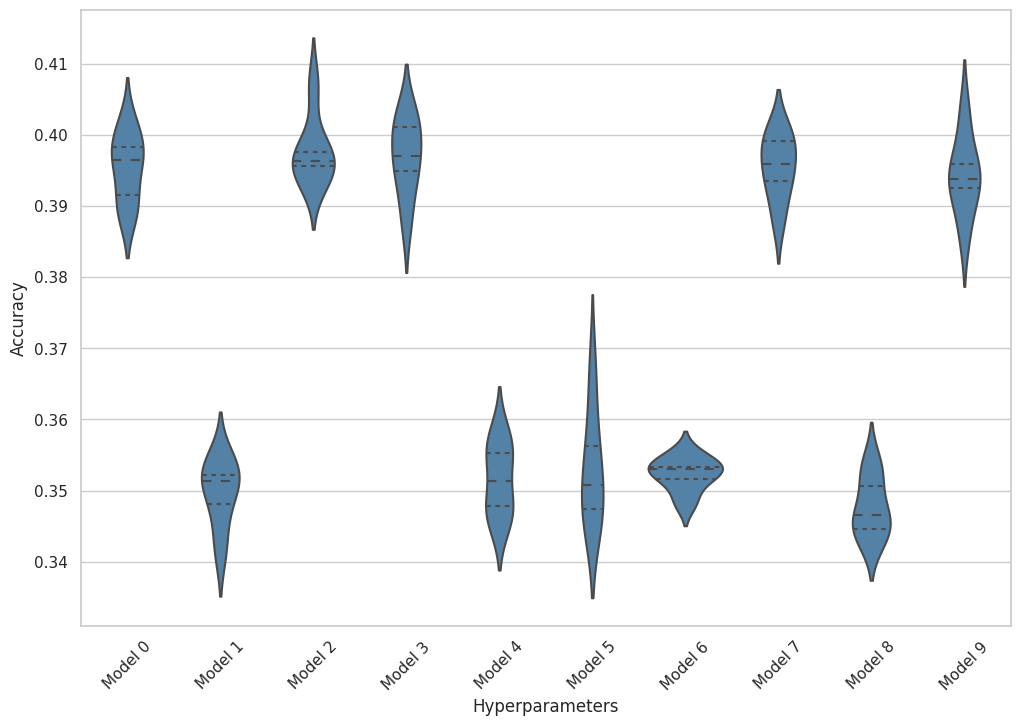

In [5]:
model_analysis('../results/dt_tuning.json', 'dt')

Mean accuracies: [0.5614209012877627, 0.586976312282042, 0.5301330846128414, 0.5524484848051134, 0.5612546652071831, 0.5889037619140055, 0.5614709554916151, 0.5519996700822333, 0.5611220023510368, 0.5641460889653507]
Model : Average Accuracy [Min, Max]
Model 0: 0.5614 [0.5503, 0.5659]
Model 1: 0.5870 [0.5785, 0.5939]
Model 2: 0.5301 [0.5261, 0.5374]
Model 3: 0.5524 [0.5439, 0.5591]
Model 4: 0.5613 [0.5531, 0.5661]
Model 5: 0.5889 [0.5819, 0.5931]
Model 6: 0.5615 [0.5566, 0.5656]
Model 7: 0.5520 [0.5436, 0.5617]
Model 8: 0.5611 [0.5538, 0.5668]
Model 9: 0.5641 [0.5538, 0.5725]
Best model index: 5
Best model hyperparameters: {'n_estimators': 150, 'criterion': 'gini', 'min_impurity_decrease': 0.0, 'max_depth': 150}
Wilcoxon test results: [{'model': '0', 'p_value': 0.03125}, {'model': '1', 'p_value': 0.4375}, {'model': '2', 'p_value': 0.03125}, {'model': '3', 'p_value': 0.03125}, {'model': '4', 'p_value': 0.03125}, {'model': '6', 'p_value': 0.03125}, {'model': '7', 'p_value': 0.03125}, {'m

/home/paolo/anaconda3/envs/DMML/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


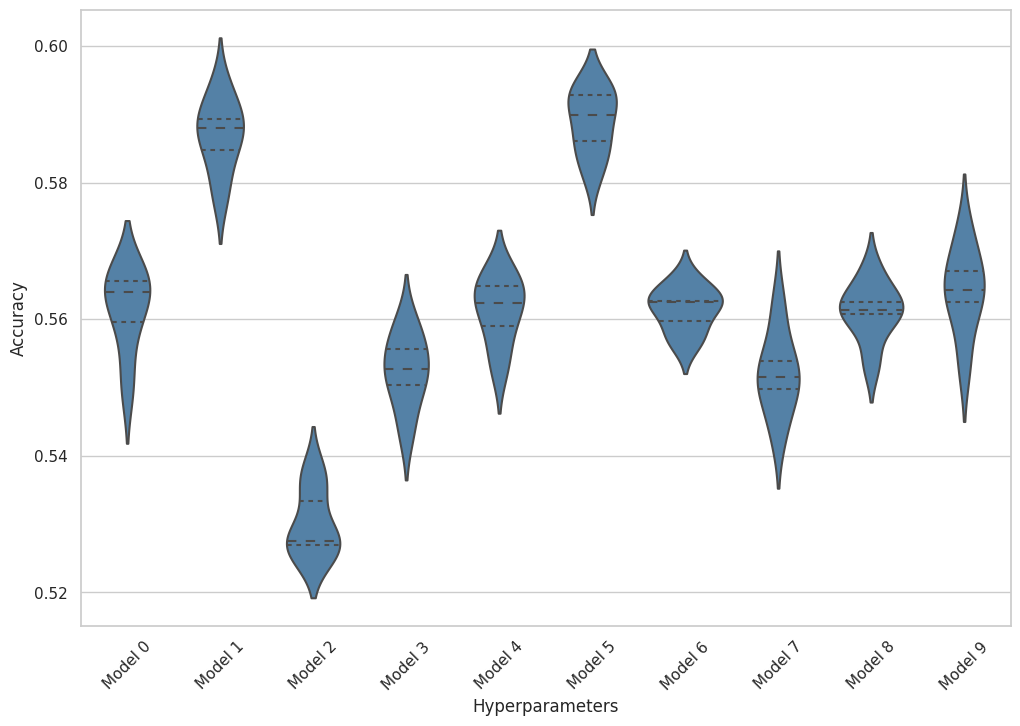

In [6]:
model_analysis('../results/rf_tuning.json', 'rf')

Mean accuracies: [0.5371118260544191, 0.5512190358774472, 0.5894023359754916, 0.5829552034422767, 0.5808950528536014, 0.5778707525448114, 0.5846335399808616, 0.5668546217261551, 0.5735178407886035, 0.5814933046207471]
Model : Average Accuracy [Min, Max]
Model 0: 0.5371 [0.4967, 0.5583]
Model 1: 0.5512 [0.5391, 0.5709]
Model 2: 0.5894 [0.5835, 0.5943]
Model 3: 0.5830 [0.5752, 0.5891]
Model 4: 0.5809 [0.5763, 0.5907]
Model 5: 0.5779 [0.5727, 0.5831]
Model 6: 0.5846 [0.5778, 0.5894]
Model 7: 0.5669 [0.5558, 0.5764]
Model 8: 0.5735 [0.5330, 0.5879]
Model 9: 0.5815 [0.5742, 0.5882]
Best model index: 2
Best model hyperparameters: {'hidden_size': 64, 'epochs': 8, 'lr': 0.0005}
Wilcoxon test results: [{'model': '0', 'p_value': 0.03125}, {'model': '1', 'p_value': 0.03125}, {'model': '3', 'p_value': 0.15625}, {'model': '4', 'p_value': 0.03125}, {'model': '5', 'p_value': 0.03125}, {'model': '6', 'p_value': 0.0625}, {'model': '7', 'p_value': 0.03125}, {'model': '8', 'p_value': 0.09375}, {'model': 

/home/paolo/anaconda3/envs/DMML/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


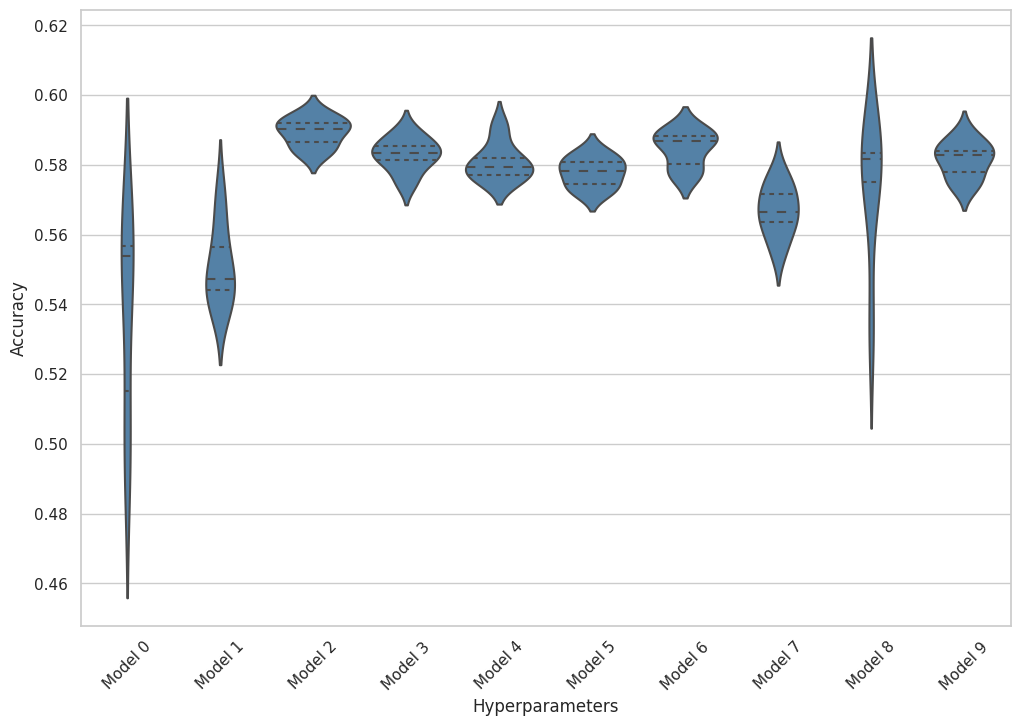

In [7]:
model_analysis('../results/nn_tuning.json', 'nn')

In [8]:
def best_analysis():
    """
    Funzione principale che carica i dati, esegue il test di Wilcoxon e plotta i risultati.

    Parameters:
        json_file (str): Percorso al file JSON contenente i dati dei modelli.
    """
    try:
        json_file = '../results/best.json'
        # Carica i dati dal file JSON
        with open(json_file, 'r') as file:
            model_data = json.load(file)

        name_map = {
            'rf': 'Random Forest',
            'dt': 'Decision Tree',
            'nn': 'Neural Network'
        }

        # Calcola la media delle accuracies per ciascun modello
        mean_accuracies = [np.mean(d['accuracies']) for d in model_data]

        # Stampa le accuratezze medie
        print(f"Mean accuracies: {mean_accuracies}")

        print(f"Model : Average Accuracy [Min, Max]")
        res = []
        for i, d in enumerate(model_data):
            res.append({
                "model": name_map[d['model_name']],
                "mean_accuracy": mean_accuracies[i],
                "min_accuracy": min(d['accuracies']),
                "max_accuracy": max(d['accuracies'])
            })
            print(f"{name_map[d['model_name']]}: {mean_accuracies[i]:.4f} [{min(d['accuracies']):.4f}, {max(d['accuracies']):.4f}]")


        # Trova l'indice del modello con la migliore accuracy media
        best_index = np.argmax(mean_accuracies)
        best_data = model_data[best_index]

        # Esegui il test di Wilcoxon tra il miglior modello e gli altri
        wilcoxon_results = wilcoxon_test(best_index, model_data)

        # Stampa i risultati
        print(f"\nBest model name: {best_data['model_name']}")
        print(f"Best model hyperparameters: {best_data['hyperparams']}")
        print(f"Best model mean accuracy: {mean_accuracies[best_index]}")
        print("\nWilcoxon test results:")
        for result in wilcoxon_results:
            print(f"Model: {result['model']}, p-value: {result['p_value']}")

        # Crea e mostra il violin plot per il confronto delle accuracy
        plotter = Plotter()
        x_labels = [name_map[d['model_name']] for d in model_data]

        plotter.plot_violin_accuracy_comparison(model_data, title='', x_label='Models', x_ticks_labels=x_labels, label_rotation=0)

        return res

    except FileNotFoundError:
        print(f"File not found: {json_file}")
    except json.JSONDecodeError:
        print(f"Error decoding JSON file: {json_file}")
    except Exception as e:
        print(f"An error occurred: {e}")

Mean accuracies: [0.3977370202223556, 0.5889037619140055, 0.5894023359754916]
Model : Average Accuracy [Min, Max]
Decision Tree: 0.3977 [0.3934, 0.4070]
Random Forest: 0.5889 [0.5819, 0.5931]
Neural Network: 0.5894 [0.5835, 0.5943]

Best model name: nn
Best model hyperparameters: {'hidden_size': 64, 'epochs': 8, 'lr': 0.0005}
Best model mean accuracy: 0.5894023359754916

Wilcoxon test results:
Model: dt, p-value: 0.03125
Model: rf, p-value: 1.0


/home/paolo/anaconda3/envs/DMML/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


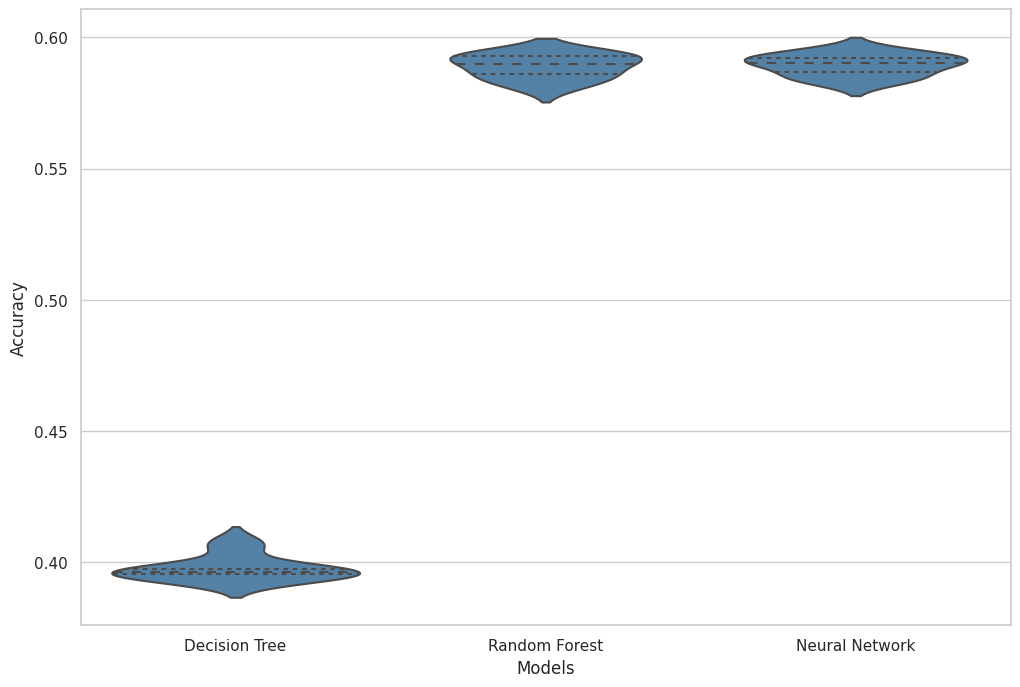

In [9]:
train_res = best_analysis()

In [10]:
from vinum_analytica.data import WineDatasetManager # type: ignore
from vinum_analytica.models import TreeModel, RandomForestModel, NeuralNetworkModel # type: ignore

dataset = WineDatasetManager()
dataset.load('../data/processed/test_classification.csv')
testset = dataset


In [11]:
tree = TreeModel.load('../models/tree_model.pkl')
forest = RandomForestModel.load('../models/random_forest_model.pkl')
neural = NeuralNetworkModel.load('../models/nn_model.pkl')

test_res = [{
    "model": "Decision Tree",
    "accuracy": tree.evaluate(testset)
}, {
    "model": "Random Forest",
    "accuracy": forest.evaluate(testset)
}, {
    "model": "Neural Network",
    "accuracy": neural.evaluate(testset)
}]


In [12]:
print("Validation accuracies:")
for res in train_res:
    print(f"{res['model']}: {res['mean_accuracy']:.4f}")
print("Test accuracies:")
for res in test_res:
    print(f"{res['model']}: {res['accuracy']:.4f}")

Validation accuracies:
Decision Tree: 0.3977
Random Forest: 0.5889
Neural Network: 0.5894
Test accuracies:
Decision Tree: 0.3987
Random Forest: 0.5925
Neural Network: 0.5996


In [13]:
combined_results = []

for train, test in zip(train_res, test_res):
    combined_results.append({
        "model": train['model'],
        "validation_accuracy": train['mean_accuracy'],
        "test_accuracy": test['accuracy']
    })

print(combined_results)

[{'model': 'Decision Tree', 'validation_accuracy': 0.3977370202223556, 'test_accuracy': 0.39871062076299346}, {'model': 'Random Forest', 'validation_accuracy': 0.5889037619140055, 'test_accuracy': 0.5925162833975808}, {'model': 'Neural Network', 'validation_accuracy': 0.5894023359754916, 'test_accuracy': 0.5996278080552971}]


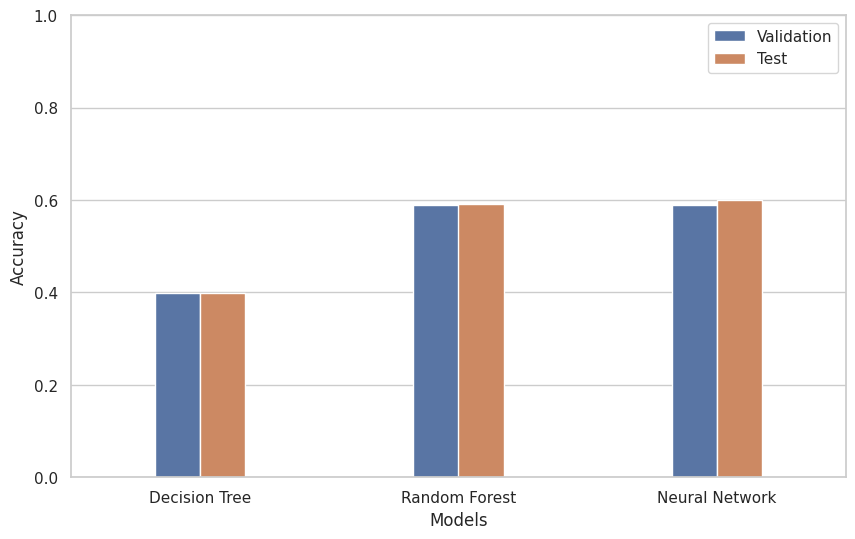

In [14]:
plotter = Plotter()
plotter.plot_validation_test_accuracy_comparison(combined_results, bar_width=0.35)

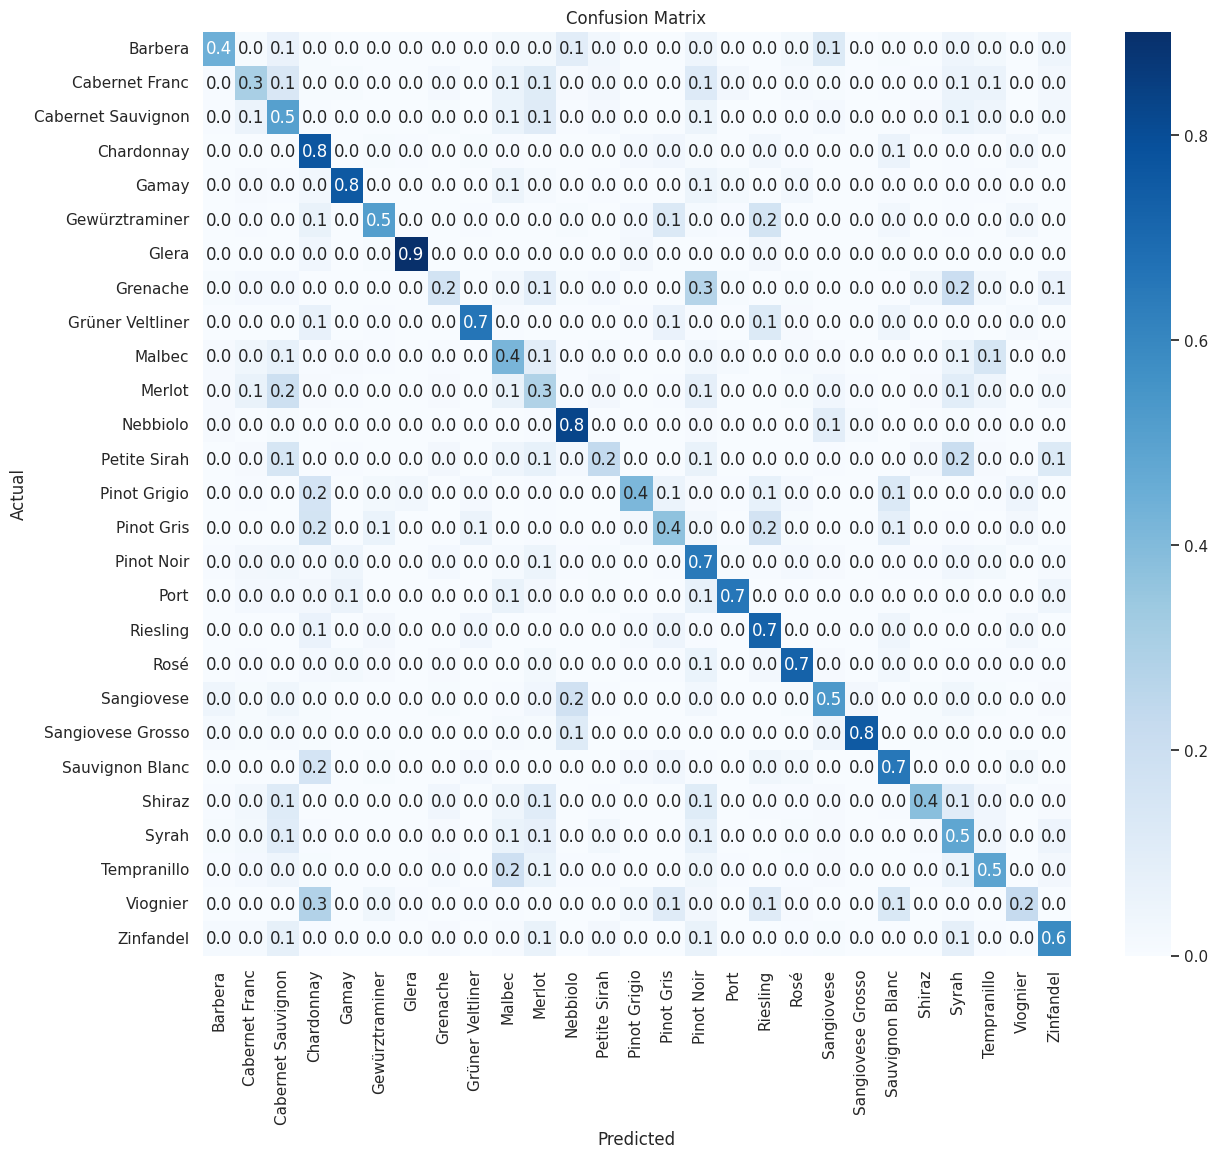

In [15]:
from sklearn.metrics import confusion_matrix

matrix = neural.evaluate(testset, metric=confusion_matrix, normalize='true')
plotter.plot_confusion_matrix(cm = matrix, classes = neural.classes(), figsize=(14, 12))

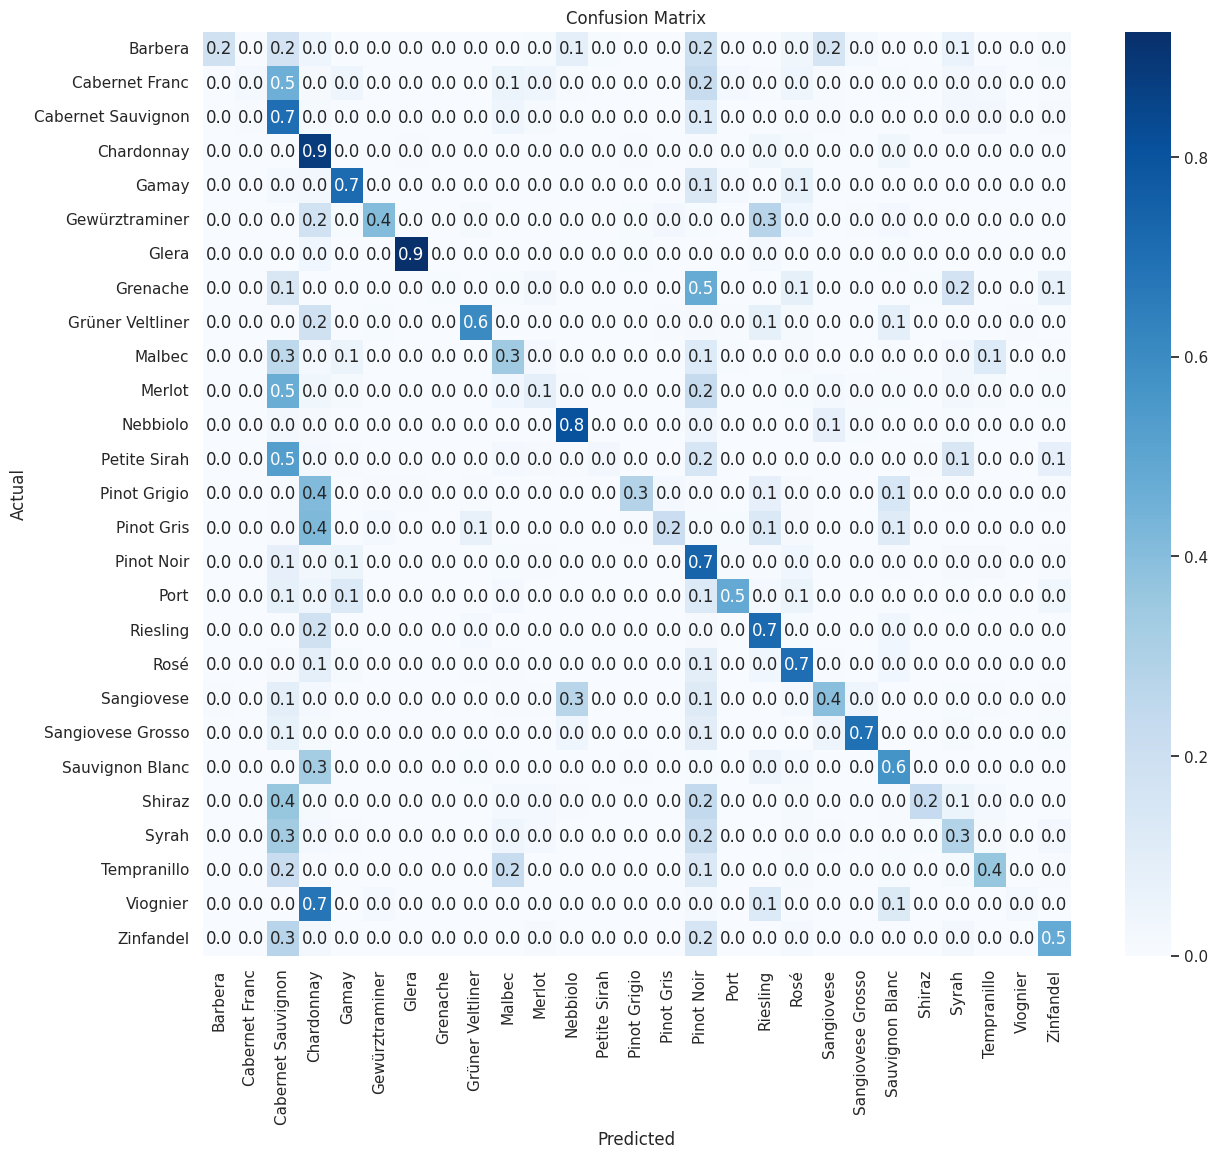

In [16]:
from sklearn.metrics import confusion_matrix

matrix = forest.evaluate(testset, metric=confusion_matrix, normalize='true')
plotter.plot_confusion_matrix(cm = matrix, classes = forest.classes(), figsize=(14, 12))